1.Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns (Source: UCI documentation)
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
    'restecg', 'thalach', 'exang', 'oldpeak', 
    'slope', 'ca', 'thal', 'target'
]

# Load data, handling '?' as missing values
df = pd.read_csv('../data/heart.csv', names=columns, na_values='?')
print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2.Clean data

In [2]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Convert target to binary (0 = No Disease, 1 = Disease)
# The original data has 0-4, where 1-4 indicates disease presence.
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("\nCleaned Data Shape:", df.shape)
print("Class Distribution:\n", df['target'].value_counts())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Cleaned Data Shape: (297, 14)
Class Distribution:
 target
0    160
1    137
Name: count, dtype: int64


3.Visualization (EDA)

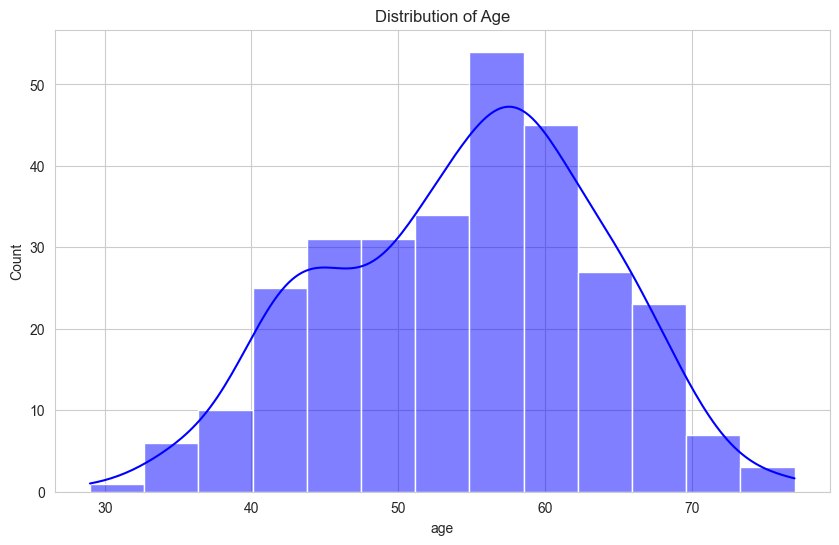

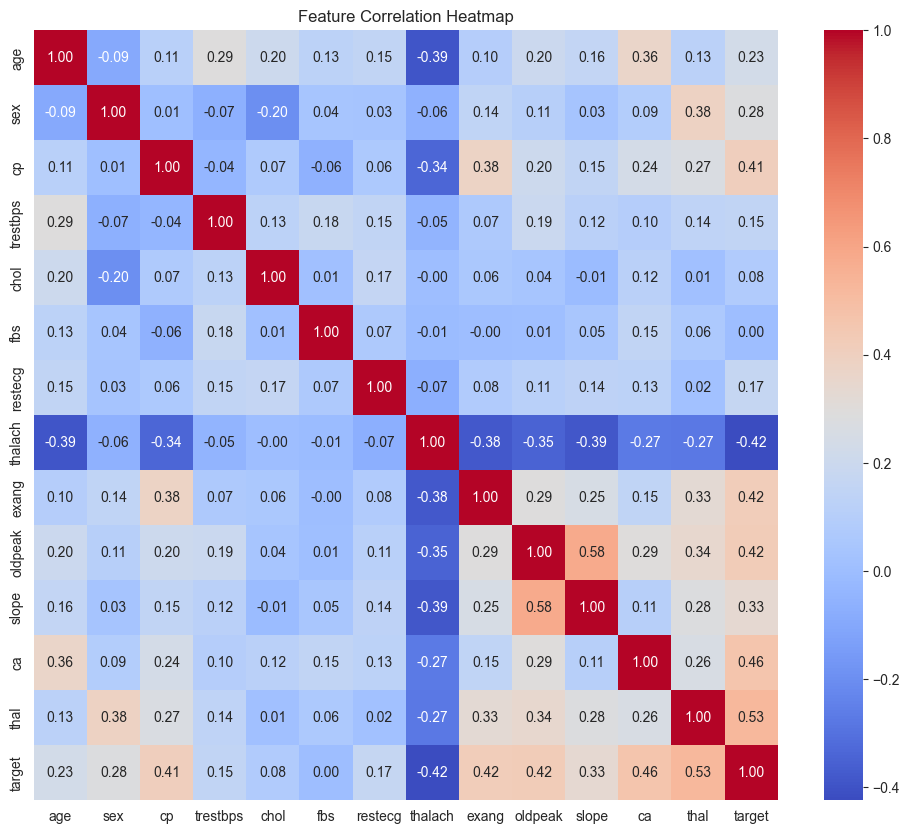

C:\Users\Ilango\AppData\Local\Temp\ipykernel_11972\4178112987.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


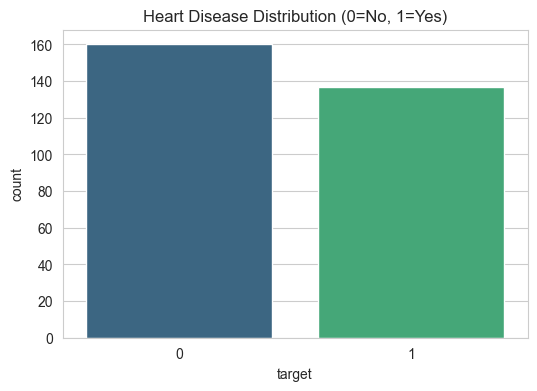

In [ ]:
# Set visualization style
sns.set_style("whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Target Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', legend=False, palette='viridis')
plt.title('Heart Disease Distribution (0=No, 1=Yes)')
plt.show()